In [1]:
import matplotlib.pyplot as plt
import numpy as np

# display one face
def displayoneimage(image, title=''):
    global image_count
    image_count += 1
    plt.figure(image_count)
    current_face = np.reshape(image, (20, 20), order='F')
    # image_count += 1
    # plt.figure(image_count)
    plt.title(title)
    plt.imshow(current_face, cmap=plt.cm.gray)


def readdata(path, shape):
    infile = open(path, 'r')
    img_data = infile.read().strip().split('\n')
    img = [map(float, a.strip().split(',')) for a in img_data]
    pixels = []
    for p in img:
        pixels += p
    return np.reshape(pixels, shape)


def sigmoid(d):
    return 1 / (1 + np.exp(-1 * d))


In [2]:
hidden_dim = 25
input_dim = 400
output_dim = 10

images_raw = readdata(r'G:\pythonalgos\NeuralHw\ps5_data.csv', (-1, input_dim))
images = []
for im in images_raw:
    images.append(np.append(im, [1]))
images = np.array(images)

labels_raw = readdata(r'G:\pythonalgos\NeuralHw\ps5_data-labels.csv', (-1, 1))
labels = np.zeros((labels_raw.shape[0], 10), dtype=int)
labels_raw_pos = 0
for lraw in labels_raw:
    curpos = int(lraw)
    if curpos == 10:
        curpos = 0
    labels[labels_raw_pos, curpos] = 1
    labels_raw_pos += 1

theta1 = readdata(r'G:\pythonalgos\NeuralHw\ps5_theta1.csv', (hidden_dim, -1))
theta2 = readdata(r'G:\pythonalgos\NeuralHw\ps5_theta2.csv', (output_dim, -1))

image_count = 0

0
6
8


(5000, 401)

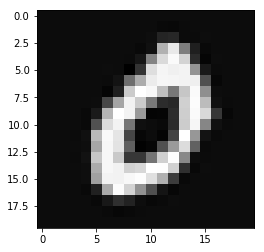

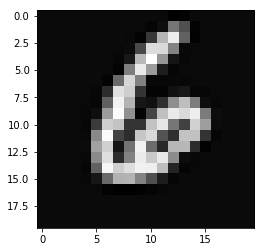

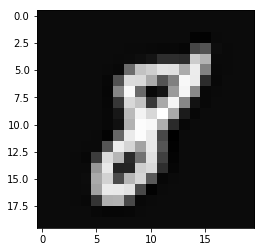

In [3]:
# test raw data

displayoneimage(images_raw[3])
displayoneimage(images_raw[3000])
displayoneimage(images_raw[4000])
print(np.argmax(labels[3]))
print(np.argmax(labels[3000]))
print(np.argmax(labels[4000]))
#print(images[0])
images.shape

In [4]:
hiddenval_raw = np.matmul(theta1, images.T)
hiddenval = sigmoid(hiddenval_raw)
hiddenval[0]


array([0.38873915, 0.21036643, 0.22763938, ..., 0.25579584, 0.48018408,
       0.94998022])

In [5]:
hiddenval_appendone = np.vstack([hiddenval, np.ones(hiddenval.shape[1])])

outputval_raw = np.matmul(theta2, hiddenval_appendone)
outputval = sigmoid(outputval_raw)
print(outputval[:, 2])
print(outputval.shape)
#


[1.84212606e-03 4.72846830e-01 2.59118303e-03 6.12864130e-01
 1.44202635e-02 2.93789827e-02 3.29997418e-03 1.38625373e-04
 1.48441196e-03 1.26603169e-02]
(10, 5000)


In [8]:
our_answer = np.argmax(outputval, axis=0)
correct_answer = np.argmax(labels, axis=1)

correct_pos = (our_answer == correct_answer) == True

accuracy = np.sum(correct_pos) / correct_pos.shape[0]
accuracy


0.1742